<a href="https://colab.research.google.com/github/omnianasser449-lab/Marketing-Analytics-Portfolio/blob/main/campaign_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv"

df = pd.read_csv(url)

print(df.head())

   age          job  marital          education  default housing loan  \
0   44  blue-collar  married           basic.4y  unknown     yes   no   
1   53   technician  married            unknown       no      no   no   
2   28   management   single  university.degree       no     yes   no   
3   39     services  married        high.school       no      no   no   
4   55      retired  married           basic.4y       no     yes   no   

    contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0  cellular   aug         thu  ...         1    999         0  nonexistent   
1  cellular   nov         fri  ...         1    999         0  nonexistent   
2  cellular   jun         thu  ...         3      6         2      success   
3  cellular   apr         fri  ...         2    999         0  nonexistent   
4  cellular   aug         fri  ...         1      3         1      success   

  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  nr_employed  y  
0          1.4   

In [ ]:
print(df.isnull().sum())

education_conversion = df.groupby("education")['y'].mean().sort_values(ascending=False)
print(education_conversion)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64
education
illiterate             0.222222
unknown                0.145003
university.degree      0.137245
professional.course    0.113485
high.school            0.108355
basic.4y               0.102490
basic.6y               0.082024
basic.9y               0.078246
Name: y, dtype: float64


In [ ]:
df['age'].mean()
buyers = df[df['y']== 1]
buyers['age'].mean()

np.float64(40.91314655172414)

In [ ]:
df['y'].value_counts()

,count
y,
0,36548
1,4640


In [ ]:
pd.crosstab(df['marital'], df['y'], normalize = 'index')

y,0,1
marital,,
divorced,0.896791,0.103209
married,0.898427,0.101573
single,0.859959,0.140041
unknown,0.850000,0.150000


In [ ]:
pd.crosstab(df['month'], df['y'], normalize='index').sort_values(by=1, ascending=False)

y,0,1
month,,
mar,0.494505,0.505495
dec,0.510989,0.489011
sep,0.550877,0.449123
oct,0.561281,0.438719
apr,0.795213,0.204787
aug,0.893979,0.106021
jun,0.894885,0.105115
nov,0.898561,0.101439
jul,0.909534,0.090466


In [ ]:
features = ['age','campaign']
x = df[features]
y = df['y']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.20, random_state=42)

print("training set has", len(x_train), "rows.")
print("testing set has", len(x_test), "rows.")

training set has 32950 rows.
testing set has 8238 rows.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=24)
model.fit(x_train, y_train)
print("the AI has finished styding")

the AI has finished styding


In [ ]:
prediction = model.predict(x_test)
print("the first 10 predictions", predictions[:10])

the first 10 predictions [0 0 0 0 0 0 0 0 0 0]


In [ ]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, prediction)
print(f"the accuracy is : {score*100:.2f}%")

the accuracy is : 88.35%


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = features

importance_df = pd.DataFrame({'features': feature_names, 'importance' : importances})
importance_df = importance_df.sort_values(by= 'importance', ascending = False)
print(importance_df)

   features  importance
0       age    0.848373
1  campaign    0.151627


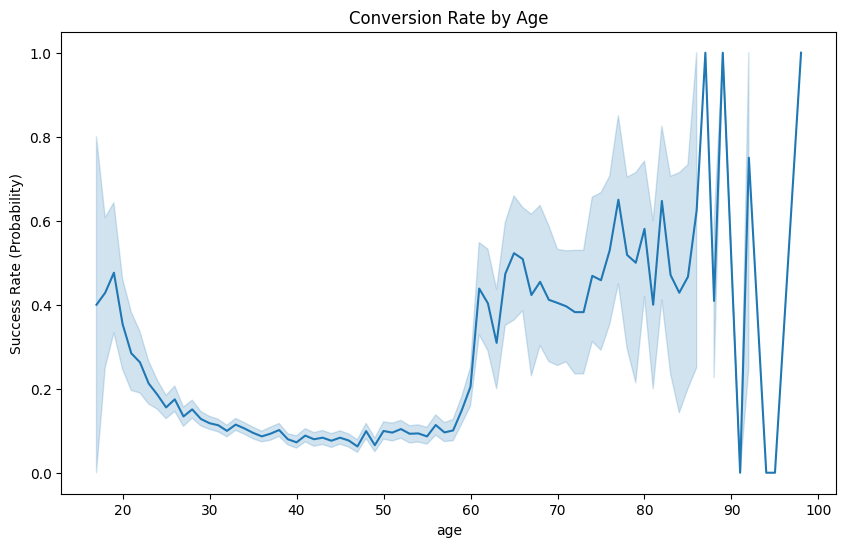

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='age', y='y')
plt.title('Conversion Rate by Age')
plt.ylabel('Success Rate (Probability)')
plt.show()

In [ ]:
new_customer = pd.DataFrame({'age': [50],  'campaign': [1]})
prediction = model.predict(new_customer)
probability = model.predict_proba(new_customer)

print(f"prediction for the new customer : {prediction[0]}")
print(f"accuracy : {probability[0][prediction[0]]*100:.2f}%")

prediction for the new customer : 0
accuracy : 89.38%


In [ ]:
import joblib


joblib.dump(model, 'marketing_model.pkl')

print("Model saved as marketing_model.pkl")

Model saved as marketing_model.pkl
